# To Recognise Handwritten Digits.

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

The input feature contains images.
Output feature contains 10 classes (digits varying from 0 to 9)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import ELU, PReLU, LeakyReLU

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the Data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Basic Checks

In [3]:
(x_train, y_train)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
x_train[4000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[4000]

7

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

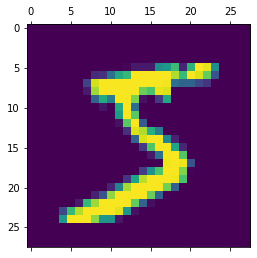

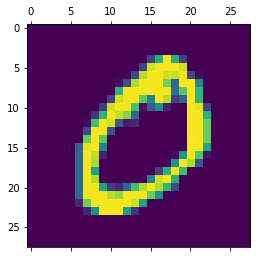

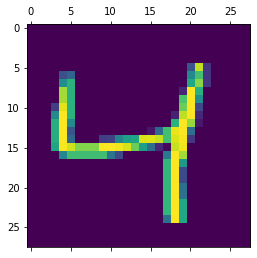

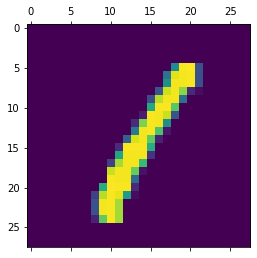

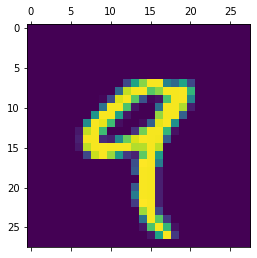

In [11]:
## Accesing first 5 input images
for i in range(5):
    plt.matshow(x_train[i])

In [12]:
## First 5 output labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### *Observations from the above Analysis
    1.While Loading the data it is split into x_train,y_train with 60000 data and x_test,y_test with 10000 data.
    2.The input variables x_train and x_test are 3 dimensional,Output variable y_train and y_test are 1 dimensional.
    3.Data Type of arrays is 'uint8'.

## Data Preprocessing

- Normalizing the values in the array as it ranges from 0 to 255

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[4000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

-  Reshaping x_train and x_test

In [15]:
x_test.dtype

dtype('float64')

In [16]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [17]:
x_train.shape

(60000, 784)

In [18]:
x_test.shape

(10000, 784)

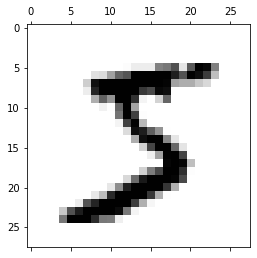

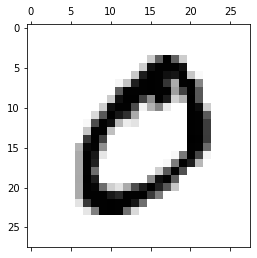

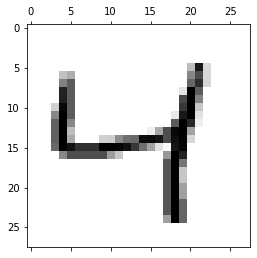

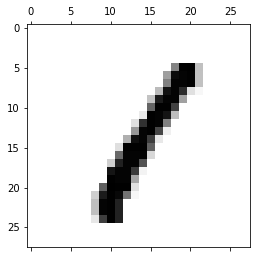

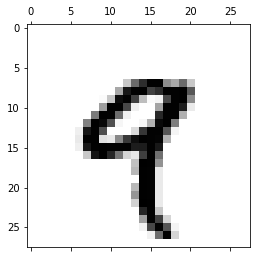

In [19]:
for i in range(5):
    random_digit=x_train[i]
    some_random_digit=random_digit.reshape(28,28)
    plt.matshow(some_random_digit,cmap=matplotlib.cm.binary,interpolation='nearest')

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### *Observation from the above Analysis
    1.After Normalization array values ranges between 0 to 1.
    2.x_train and x_test are reshaped from 3 dimension to 2 dimension so as to fit the model.

## Model Building And Evaluation

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
s=clf.score(x_test,y_test)
y_pred=clf.predict(x_test[0:5])
print("Model Predicted value",y_pred)
print("Actual Value",y_test[0:5])
print("Model Score",s)

Model Predicted value [7 2 1 0 4]
Actual Value [7 2 1 0 4]
Model Score 0.9258


### Support Vector Machine

In [22]:
from sklearn import svm
clf_svm=svm.SVC()
clf_svm.fit(x_train,y_train)
s=clf_svm.score(x_test,y_test)
y_pred=clf_svm.predict(x_test[0:5])
print("Model Predicted value",y_pred)
print("Actual Value",y_test[0:5])
print("Model Score",s)

Model Predicted value [7 2 1 0 4]
Actual Value [7 2 1 0 4]
Model Score 0.9792


### K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(x_train, y_train)
s=clf_KNN.score(x_test,y_test)
y_pred=clf_KNN.predict(x_test[0:5])
print("Model Predicted value",y_pred)
print("Actual Value",y_test[0:5])
print("Model Score",s)

Model Predicted value [7 2 1 0 4]
Actual Value [7 2 1 0 4]
Model Score 0.9688


### *Observation From the above Analysis. 
    Support Vector Machine Model has good score of 97.92%

- Resizing image to make it suitable for applying operations for Neural Network

In [24]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Creating a Deep Neural Network

In [25]:
model=Sequential()

In [26]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [29]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 7ms/step - loss: 0.2810 - sparse_categorical_accuracy: 0.9192 - val_loss: 0.1535 - val_sparse_categorical_accuracy: 0.9564
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9675
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0854 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.0945 - val_sparse_categorical_accuracy: 0.9721
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.0840 - val_sparse_categorical_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9845 - val_loss: 0.0827 - val_sparse_categorical_accuracy: 0.9754
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0379 - spar

In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9768


[0.08335640281438828, 0.9768000245094299]

In [31]:
y_prob=model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


In [32]:
y_predicted=y_prob.argmax(axis=1)

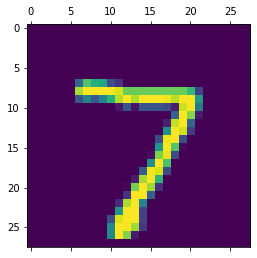

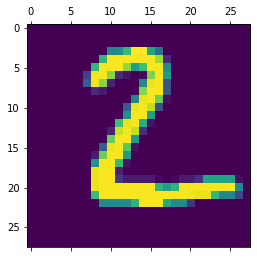

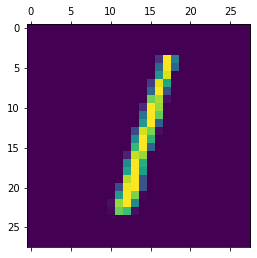

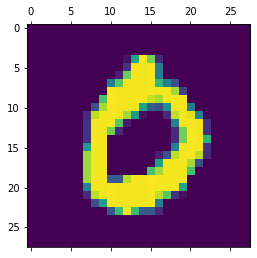

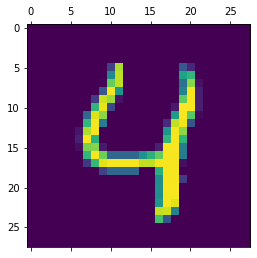

In [33]:
for i in range(5):
    plt.matshow(x_test[i])

In [34]:
sample=model.predict(x_test[0:5])

1/1 [==============================] - 0s 72ms/step


In [35]:
sample.argmax(axis=1)

array([7, 2, 1, 0, 4], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_predicted)

0.9768

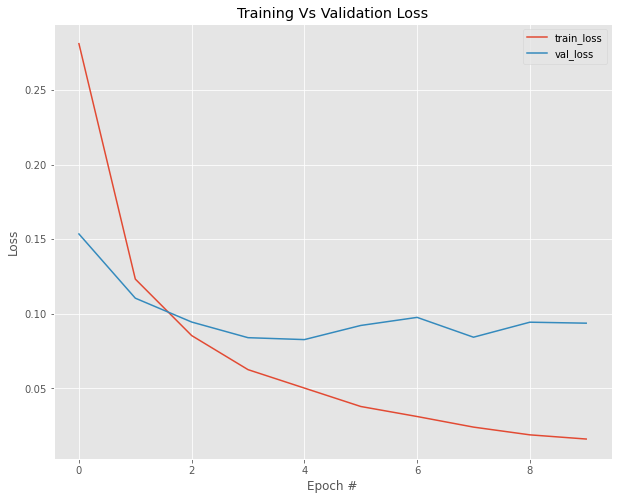

In [38]:
epochs = np.arange(0, len(history.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, history.history["loss"], label="train_loss")
plt.plot(epochs, history.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

### *Observation from the Analysis
    Artificial Neural Network model has a good score of 97%

## CNN Model

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [39]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "sparse_categorical_crossentropy"
    - metrics: "sparse_categorical_accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [40]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'], optimizer="adam")

# Fit the model
H=model.fit( x=x_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 192s 126ms/step - loss: 0.1261 - sparse_categorical_accuracy: 0.9613 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9811
Epoch 2/10
1500/1500 [==============================] - 189s 126ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0466 - val_sparse_categorical_accuracy: 0.9860
Epoch 3/10
1500/1500 [==============================] - 188s 125ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0471 - val_sparse_categorical_accuracy: 0.9875
Epoch 4/10
1500/1500 [==============================] - 190s 127ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0518 - val_sparse_categorical_accuracy: 0.9852
Epoch 5/10
1500/1500 [==============================] - 188s 125ms/step - loss: 0.0107 - sparse_categorical_accuracy: 0.9964 - val_loss: 0.0552 - val_sparse_categorical_accuracy: 0.9859
Epoch 6/10
1500/1500 [==============================] - 194s 130ms/ste

In [41]:
loss,acc=model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 9s 23ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0.9886

Test accuracy: 98.9%


In [42]:
loss,acc=model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 48s 26ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9977

Train accuracy: 99.8%


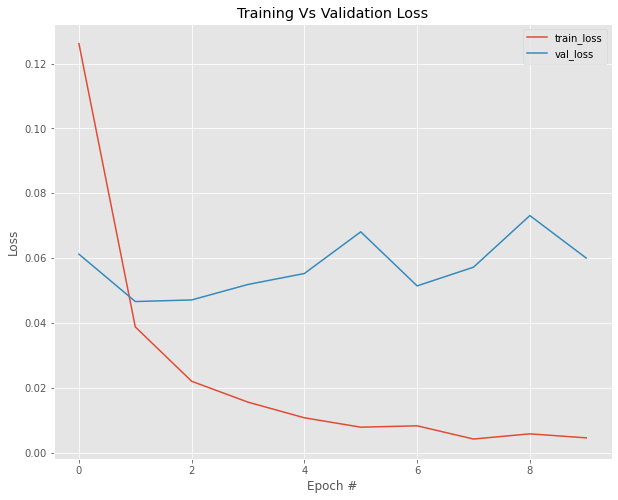

In [43]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

### *Observation from Analysis
    Convolution Neural Network model has a good score of 99%.Since Overfitting is present we use Dropout and EarlyStopping  Techniques to deal with overfitting

## Vanilla CNN + Pooling + Dropout

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [44]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.1)))



#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "sparse_categorical_crossentropy"
    - metrics: "sparse_categorical_accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [45]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'], optimizer="adam")

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
H=model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 214s 99ms/step - loss: 0.7620 - sparse_categorical_accuracy: 0.9071 - val_loss: 0.4458 - val_sparse_categorical_accuracy: 0.9472
Epoch 2/10
1875/1875 [==============================] - 205s 110ms/step - loss: 0.4329 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.3383 - val_sparse_categorical_accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 209s 112ms/step - loss: 0.3689 - sparse_categorical_accuracy: 0.9492 - val_loss: 0.3133 - val_sparse_categorical_accuracy: 0.9636
Epoch 4/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.3258 - sparse_categorical_accuracy: 0.9539 - val_loss: 0.3063 - val_sparse_categorical_accuracy: 0.9551
Epoch 5/10
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2992 - sparse_categorical_accuracy: 0.9579 - val_loss: 0.2643 - val_sparse_categorical_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 189s 101ms/step 

### Final loss and accuracy

In [47]:
loss,acc=model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 6s 20ms/step - loss: 0.2143 - sparse_categorical_accuracy: 0.9749

Test accuracy: 97.5%


In [48]:
loss,acc=model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 36s 19ms/step - loss: 0.2242 - sparse_categorical_accuracy: 0.9710

Train accuracy: 97.1%


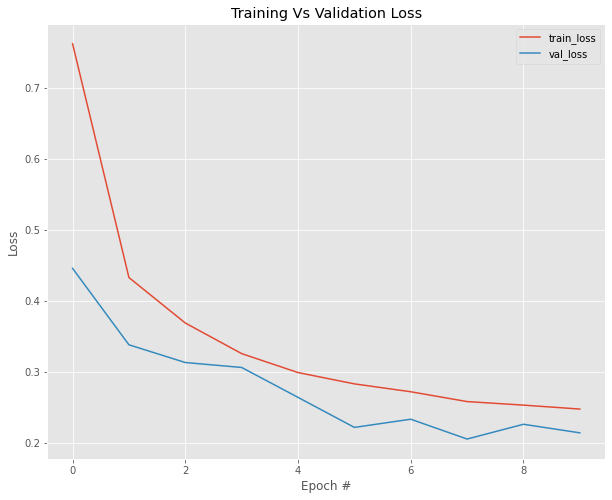

In [49]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## Observation from the above Analysis.
    1.Here we have handled the Overfitting issue with EarlyStopping and Dropout.
    2.CNN model has a good score of 97% with no overfitting.

## MODEL COMPARRISION REPORT

1. Logistic Regression - Logistic regression aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.
        Model Predicted value [7 2 1 0 4]
        Actual Value [7 2 1 0 4]
        Model Score 0.9258

2. Support Vector Machine - Support vector classifiers can be applied to the recognition of isolated handwritten digits optically scanned.
        Model Predicted value [7 2 1 0 4]
        Actual Value [7 2 1 0 4]
        Model Score 0.9792

3. K-Nearest Neighbors - KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
        Model Predicted value [7 2 1 0 4]
        Actual Value [7 2 1 0 4]
        Model Score 0.9688

4. Artificial Neural Network - ANN are useful for pattern matching applications. Pattern matching consists of the ability to identify the class of input signals or patterns. Pattern matching ANN are typically trained using supervised learning techniques.
        Model Score 0.9768


5. Convolutional Neural Network - A simple artificial neural network (ANN) has an input layer, an output layer and some hidden l ayers between the input and output layer. CNN has a very similar architecture as ANN.
        Model Score 0.989 with overfitting
        
        Model Score 0.975 with no overfitting


### From the above CNN has good accuracy with no overfitting

## REPORT ON CHALLENGES FACED
    1.Data Preprocessing
        - Normalizing the values in the array as it ranges from 0 to 255
        - Reshaping x_train and x_test
        - Resizing image to make it suitable for applying operations for Neural Network
    2.Model Buliding And Evalution
        - Randomness is handled by using metrics as sparse_categorical_accuracy
        - EarlyStopping and Dropout used for overfitting